In [ ]:
%matplotlib inline
from PIL import Image
from tesserocr import PyTessBaseAPI, RIL
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import rcParams
import glob
from matplotlib.transforms import Bbox


In [14]:
image_list = []
for filename in glob.glob('./bin/samples/*.png'):
    im=Image.open(filename)
    rgbimg = Image.new("RGB", im.size)
    rgbimg.paste(im)
    image_list.append(rgbimg)
cols = 2
rows = len(image_list)//cols +1
maxsize = 9
rcParams['figure.figsize'] =  maxsize * cols,maxsize * rows

In [12]:
rcParams['figure.figsize']

[18.0, 153.0]

Found 18 textline image components.
Found 18 textline image components.
Found 23 textline image components.
Found 17 textline image components.
Found 20 textline image components.
Found 22 textline image components.
Found 19 textline image components.
Found 18 textline image components.
Found 20 textline image components.
Found 25 textline image components.
Found 22 textline image components.
Found 17 textline image components.
Found 22 textline image components.
Found 26 textline image components.
Found 20 textline image components.
Found 29 textline image components.
Found 15 textline image components.
Found 18 textline image components.
Found 20 textline image components.
Found 31 textline image components.
Found 22 textline image components.
Found 21 textline image components.
Found 14 textline image components.
Found 0 textline image components.
Found 18 textline image components.
Found 25 textline image components.
Found 21 textline image components.
Found 33 textline image compo

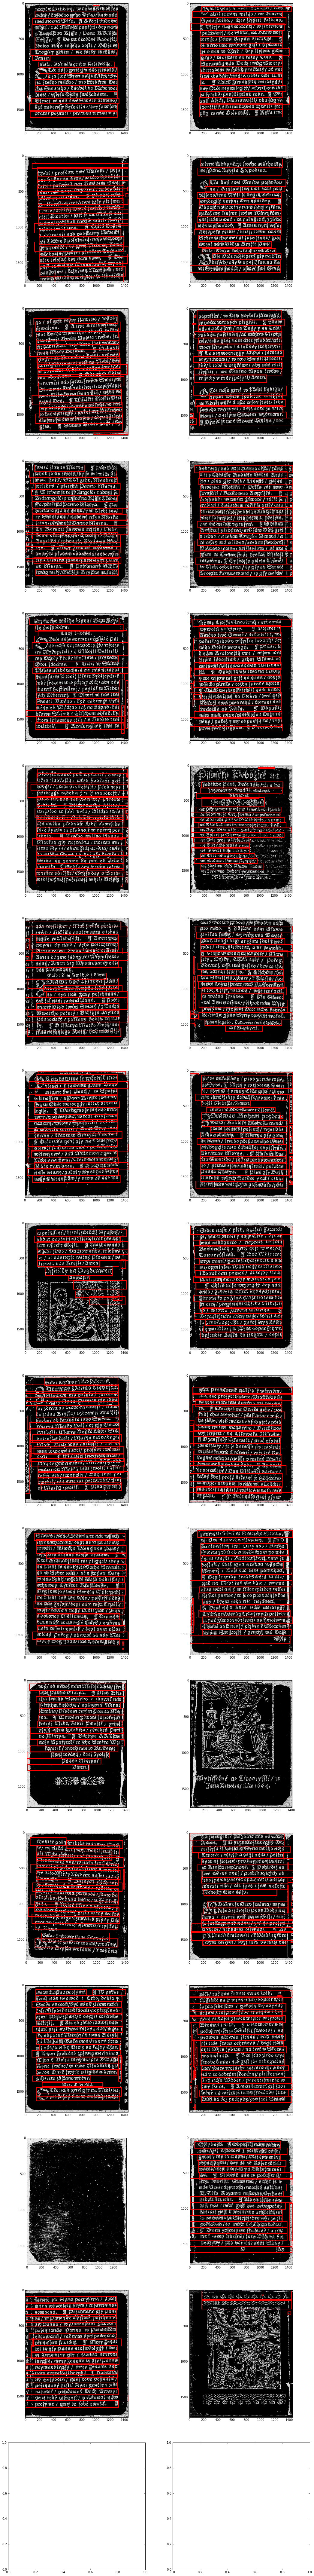

In [15]:
fig,axs = plt.subplots(rows,cols)
for i,image in enumerate(image_list):
    npimage = np.asarray(image)    
    col = i % cols
    row = i//cols
    axs[row][col].imshow(npimage)
    with PyTessBaseAPI() as api:
        api.SetImage(image)
        boxes = api.GetComponentImages(RIL.TEXTLINE, True)
        print('Found {} textline image components.'.format(len(boxes)))
        for i, (im, box, _, _) in enumerate(boxes):
            rect = patches.Rectangle((box['x'],box['y']),box['w'],box['h'],linewidth=2,edgecolor='r',facecolor='none')
            axs[row][col].add_patch(rect) 


plt.show()

In [72]:

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)
extent = full_extent(axs[0][0]).transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax2_figure.png', bbox_inches=extent)


In [73]:
import os

In [74]:
import os
os.makedirs("results",exist_ok=True)
ix = 0
for i in axs:
    for j in i:
        extent = full_extent(j).transformed(fig.dpi_scale_trans.inverted())
        fig.savefig("results/" + str(ix) + '.png', bbox_inches=extent)
        ix += 1
